In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
from queue import Queue
from scipy.optimize import curve_fit

In [2]:
f = open("./Free_TravelTime.txt", 'r')
free_times_1 = f.read()
f.close()

In [3]:
f = open("./8.30Free2.txt", 'r')
free_times_2 = f.read()
f.close()

In [4]:
free_times_list_1 = ast.literal_eval(free_times_1)
free_times_list_2 = ast.literal_eval(free_times_2)

In [81]:
free_times_list_2 = free_times_list_2[350:]

In [82]:
free_times = np.concatenate([np.array(free_times_list_1),np.array(free_times_list_2)+4200-free_times_list_2[0][0]])

In [83]:
free_times = free_times[free_times[:,1]>free_times[:,0]]

In [84]:
free_times.shape

(2022, 2)

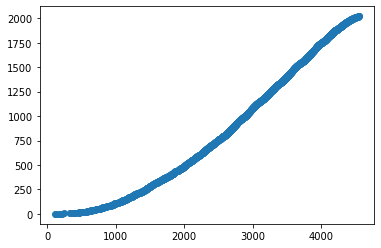

In [85]:
plt.scatter(free_times[:,1], np.arange(len(free_times[:,1])))

In [86]:
free_flow_rate = np.gradient(np.arange(len(free_times[:,1])), free_times[:,1])

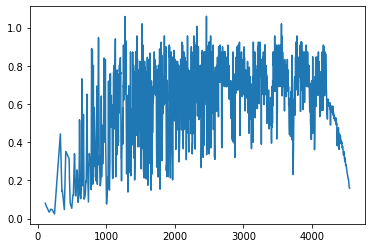

In [87]:
plt.plot(free_times[:,1], free_flow_rate)

In [88]:
N = 100
free_flow_avg = np.convolve(free_flow_rate, np.ones(N)/N, mode='valid')

In [118]:
arr_times = free_times[:,0]
dep_times = free_times[:,1]

In [119]:
i, j = 0, 0
q = Queue()
density_with_time = []
while(i+j<2*len(arr_times)):
    if(i < len(arr_times)):
        a_t = arr_times[i]
    else:
        a_t = np.inf
    d_t = dep_times[j]
    if(a_t<d_t):
        q.put(0)
        i = i+1
        # density_with_time.append([q.qsize(),a_t])
        continue
    else:
        q.get()
        j = j+1
        density_with_time.append([q.qsize(),d_t])
        continue

In [120]:
density_with_time = np.array(density_with_time)

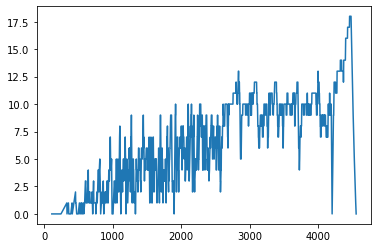

In [121]:
plt.plot(density_with_time[:,1], density_with_time[:,0])

In [122]:
N = 100
density_time_avg = np.convolve(density_with_time[:,0], np.ones(N)/N, mode='valid')

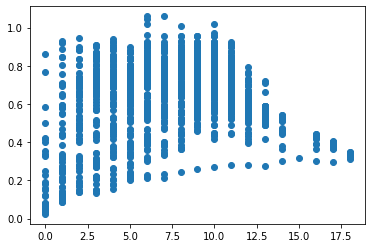

In [123]:
plt.scatter(density_with_time[:,0], free_flow_rate)

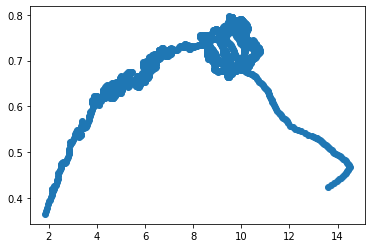

In [96]:
plt.scatter(density_time_avg, free_flow_avg)

In [124]:
f = np.poly1d(np.polyfit(density_time_avg, free_flow_avg, 2))

In [125]:
x = np.linspace(min(density_time_avg),max(density_time_avg),150)

Text(0.5, 1.0, 'VDF Free Flow')

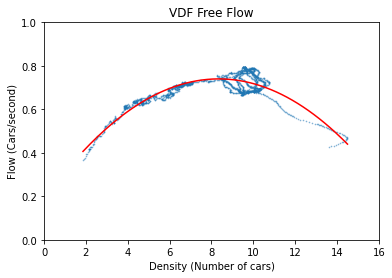

In [126]:
plt.plot(x,f(x),color='red')
plt.scatter(density_time_avg, free_flow_avg, alpha=0.5, s=0.4)
plt.xlim(0,16)
plt.ylim(0,1)
plt.ylabel("Flow (Cars/second)")
plt.xlabel("Density (Number of cars)")
plt.title("VDF Free Flow")

# Signaling

In [38]:
f = open("./Signal_TravelTime.txt", 'r')
signal_times = f.read()
f.close()

In [39]:
signal_times_list = ast.literal_eval(signal_times)

In [40]:
signal_times = np.array(signal_times_list)

In [41]:
signal_times.shape

(1012, 2)

In [42]:
signal_times = signal_times[signal_times[:,1]>signal_times[:,0]]

In [43]:
signal_times.shape

(986, 2)

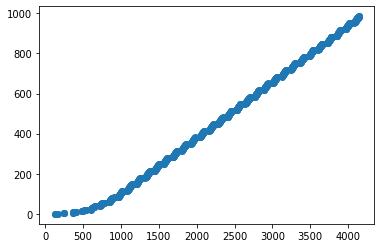

In [44]:
plt.scatter(signal_times[:,1], np.arange(len(signal_times[:,1])))

In [45]:
signal_flow_rate = np.gradient(np.arange(len(signal_times[:,1])), signal_times[:,1])

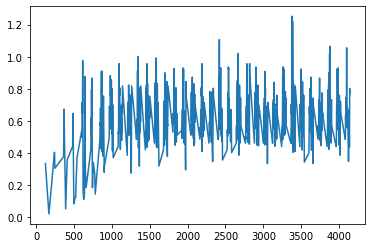

In [46]:
plt.plot(signal_times[:,1], signal_flow_rate)

In [66]:
N = 120
signal_flow_avg = np.convolve(signal_flow_rate, np.ones(N)/N, mode='valid')

In [107]:
arr_times = signal_times[:,0]
dep_times = signal_times[:,1]

In [108]:
i, j = 0, 0
q = Queue()
density_with_time = []
while(i+j<2*len(arr_times)):
    if(i < len(arr_times)):
        a_t = arr_times[i]
    else:
        a_t = np.inf
    d_t = dep_times[j]
    if(a_t<d_t):
        q.put(0)
        i = i+1
        # density_with_time.append([q.qsize(),a_t])
        continue
    else:
        q.get()
        j = j+1
        density_with_time.append([q.qsize(),d_t])
        continue

In [109]:
density_with_time = np.array(density_with_time)

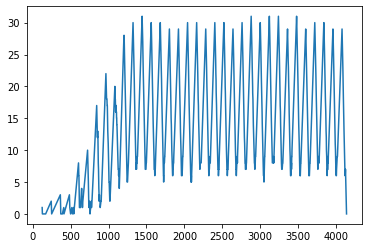

In [110]:
plt.plot(density_with_time[:,1], density_with_time[:,0])

In [111]:
N = 120
density_time_avg = np.convolve(density_with_time[:,0], np.ones(N)/N, mode='valid')

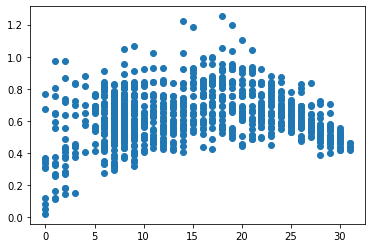

In [112]:
plt.scatter(density_with_time[:,0], signal_flow_rate)

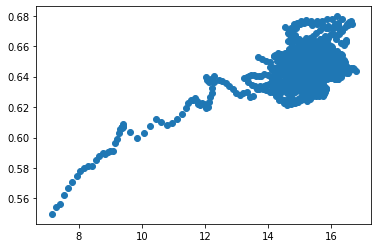

In [113]:
plt.scatter(density_time_avg, signal_flow_avg)

In [114]:
f = np.poly1d(np.polyfit(density_time_avg, signal_flow_avg, 1))

In [115]:
x = np.linspace(min(density_time_avg),max(density_time_avg),150)

Text(0.5, 1.0, 'VDF Signalized')

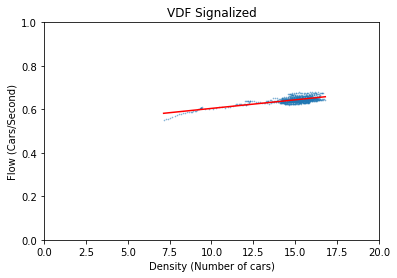

In [116]:
plt.plot(x,f(x),color='red')
plt.scatter(density_time_avg, signal_flow_avg, alpha=0.5, s=0.4)
plt.xlim(0,20)
plt.ylim(0,1)
plt.ylabel("Flow (Cars/Second)")
plt.xlabel("Density (Number of cars)")
plt.title("VDF Signalized")